### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient_129 = pd.read_csv('Patient 129_data.csv')

In [3]:
patient_129.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,7025.000000,7025.000000,7025.000000,7025.000000,7025.000000,7025.000000,7025.000000,7025.000000,7025.000000,7025.000000,...,7025.000000,7025.000000,7025.000000,7025.000000,7025.000000,7025.000000,7025.000000,7025.000000,7025.000000,7025.000000
mean,0.034316,0.255721,0.583354,1.678126,1.749795,9.569799,1.372701,1.072079,1.021786,1.075543,...,1.858551,1.833532,1.911681,2.029803,0.899995,1.599322,2.026709,1.942426,1.938752,46.978783
std,0.009255,0.015070,0.024367,0.033844,0.105518,3.730659,0.207708,0.042411,0.007905,0.034221,...,0.025257,0.020859,0.030052,0.023397,0.053515,0.030074,0.017291,0.010405,0.049394,13.643513
min,0.006082,0.209657,0.556894,1.624223,1.575965,4.110050,1.223743,1.036083,1.002015,1.000149,...,1.585989,1.782716,1.795993,1.816016,0.283111,1.315369,1.774135,1.925457,1.768455,28.200000
25%,0.029685,0.252391,0.568345,1.658315,1.675594,7.815984,1.275957,1.049967,1.022036,1.060995,...,1.852226,1.822447,1.904862,2.021279,0.883756,1.594040,2.023661,1.937624,1.923897,38.800000
50%,0.032867,0.257032,0.574657,1.666565,1.717701,8.503155,1.292105,1.055386,1.024405,1.088004,...,1.862582,1.832769,1.916768,2.030616,0.903835,1.604831,2.026862,1.940730,1.955223,43.000000
75%,0.036863,0.261558,0.584399,1.677438,1.800443,9.459076,1.328876,1.066723,1.026489,1.099025,...,1.873173,1.842689,1.926863,2.039674,0.927345,1.615351,2.031374,1.944002,1.973523,49.700000
max,0.105661,0.298311,0.710702,1.819648,1.989789,85.132436,2.996189,1.287318,1.035778,1.129680,...,1.902024,2.038501,2.062067,2.078318,1.020382,1.657216,2.054597,2.073580,2.003945,96.100000


In [4]:
X=patient_129.drop('BIS', axis=1)
y= patient_129['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

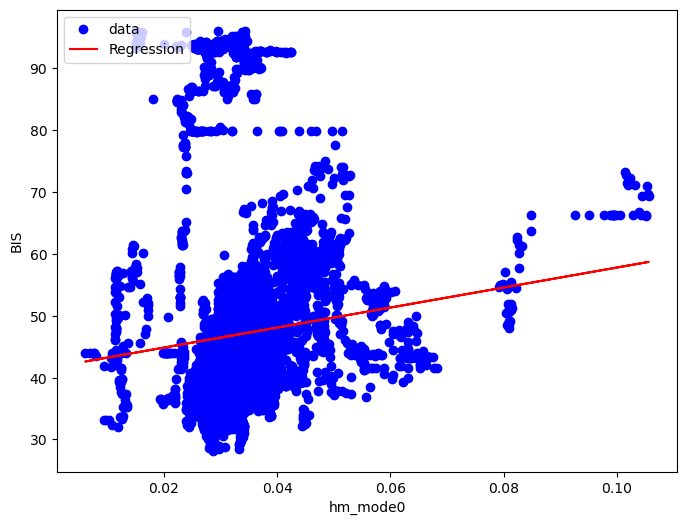

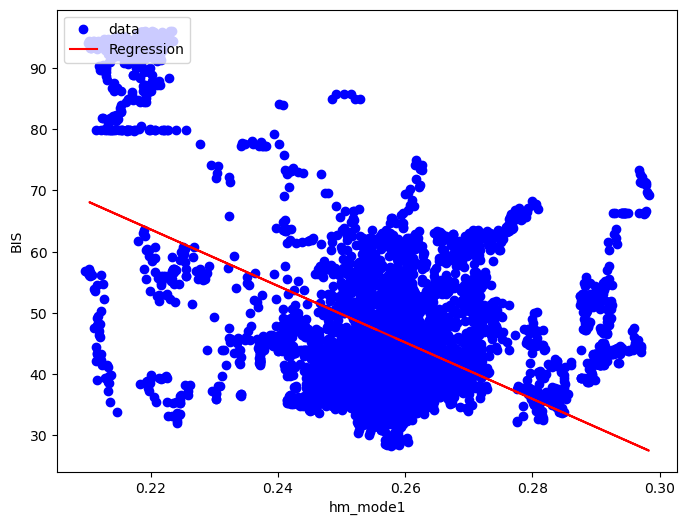

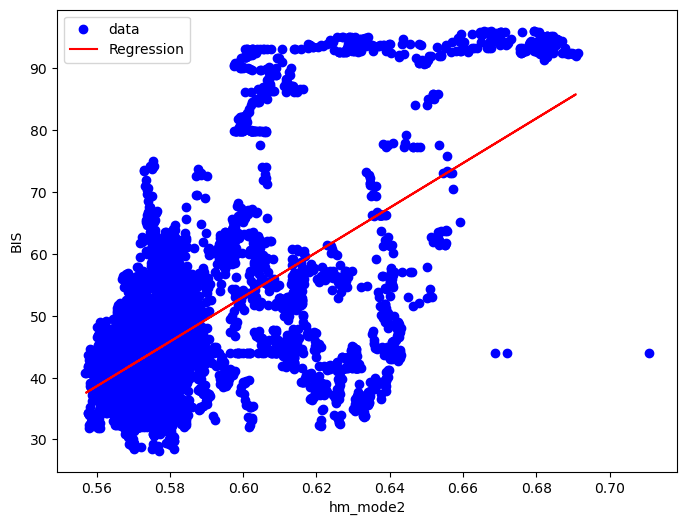

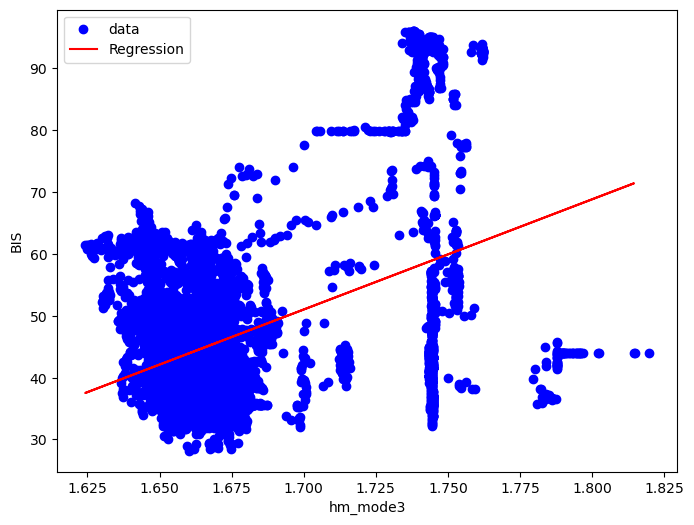

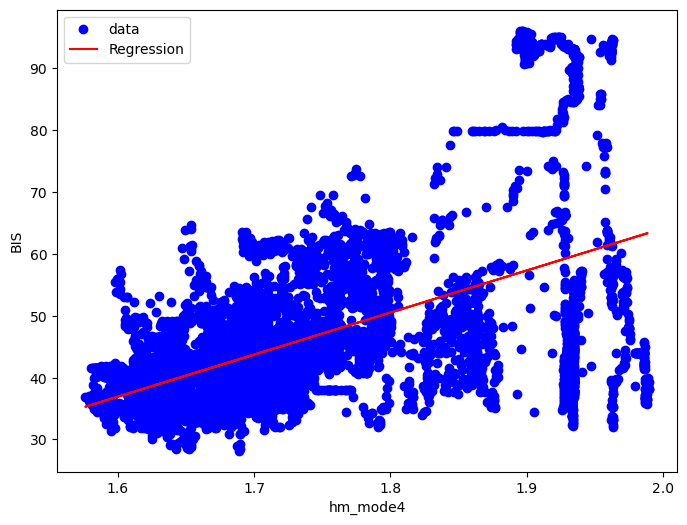

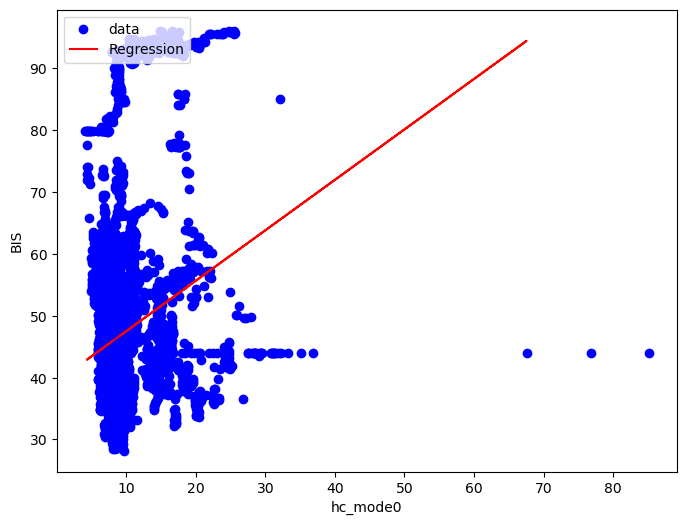

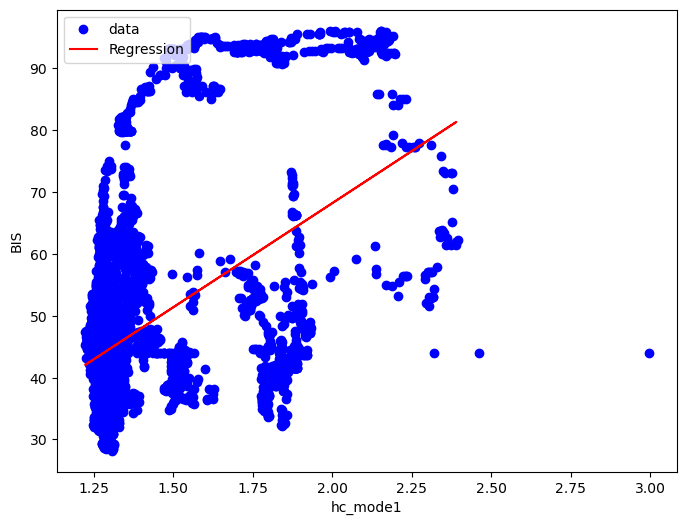

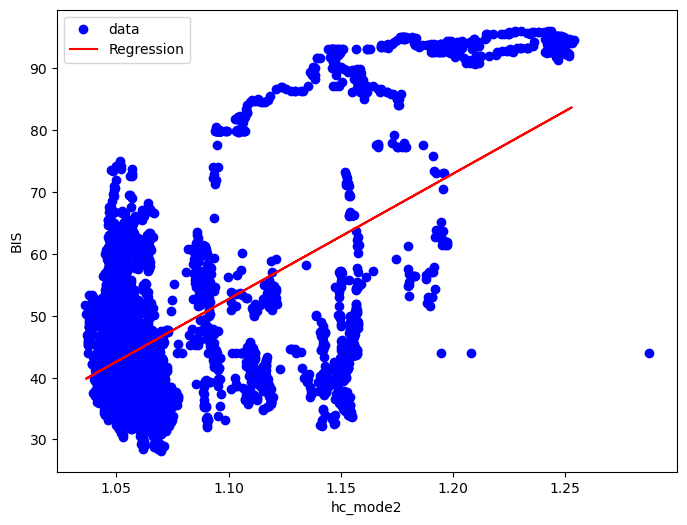

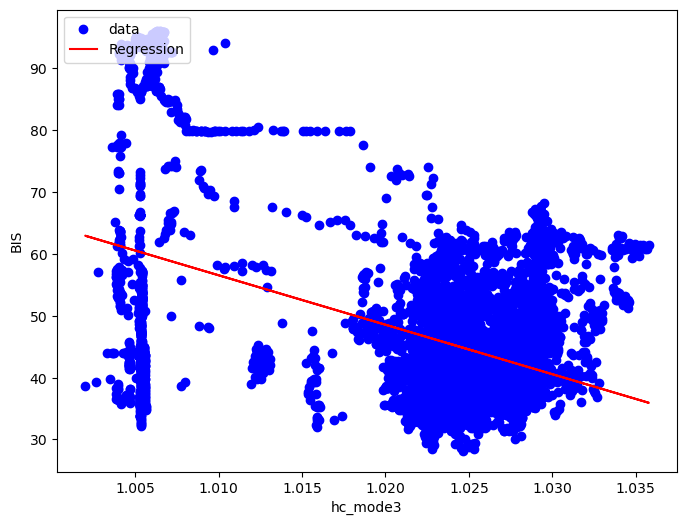

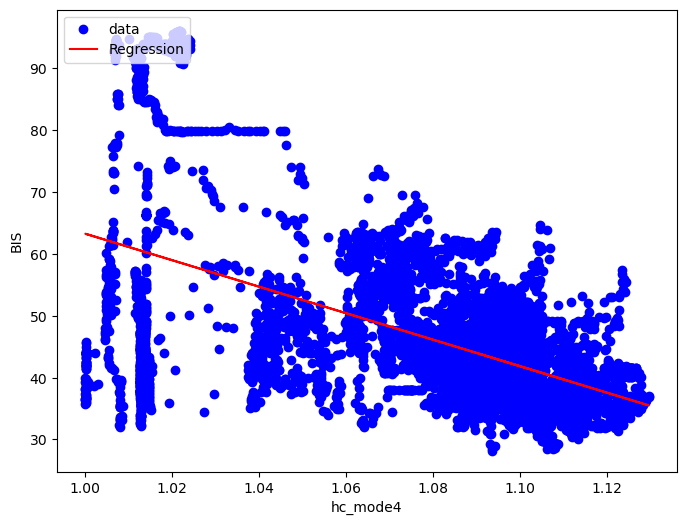

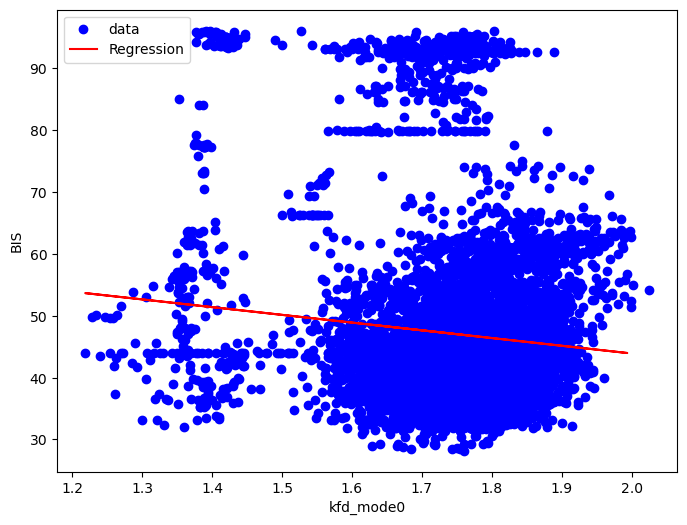

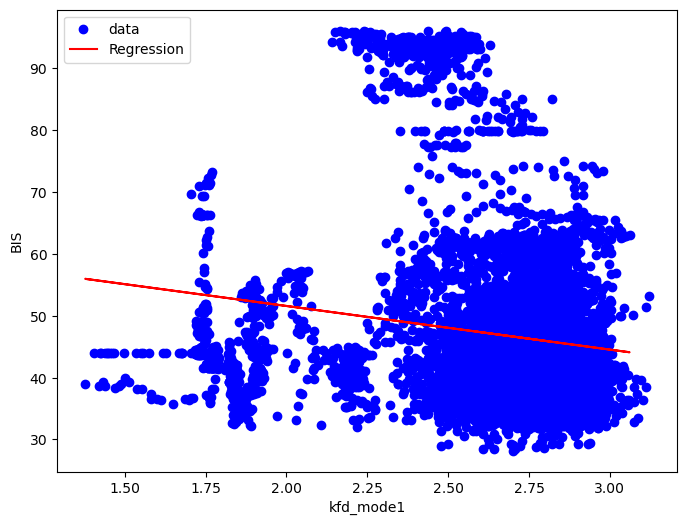

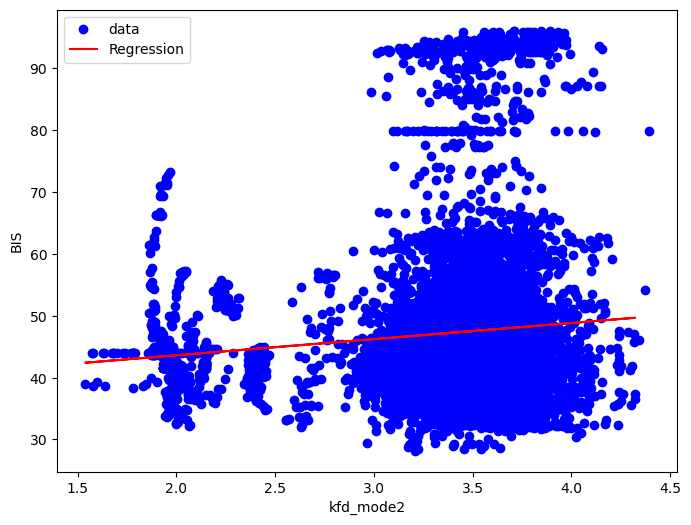

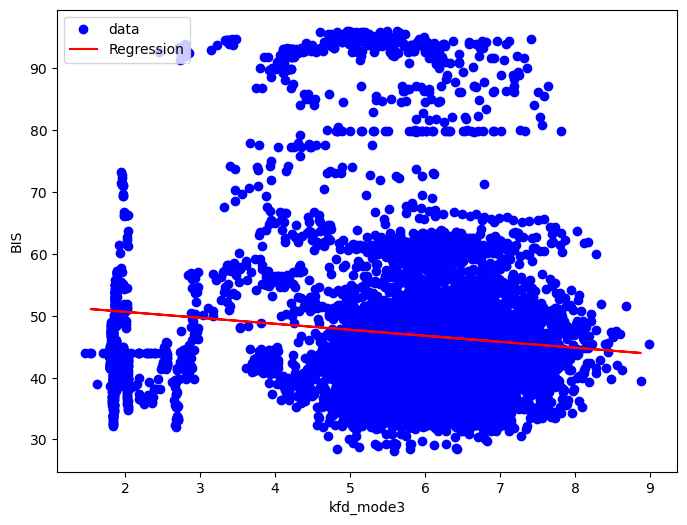

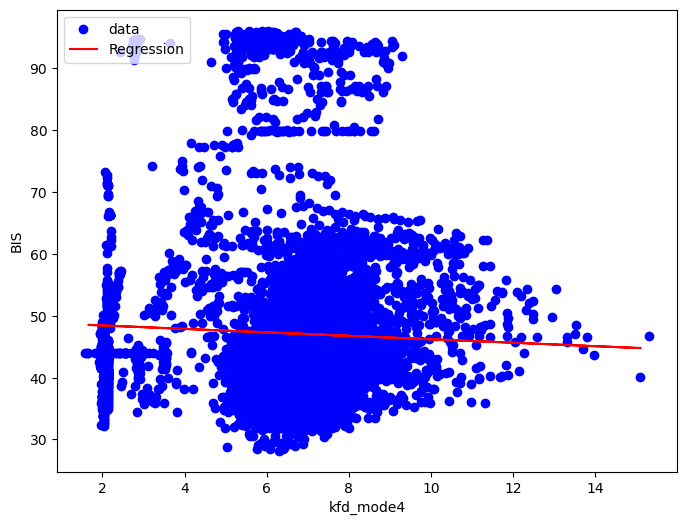

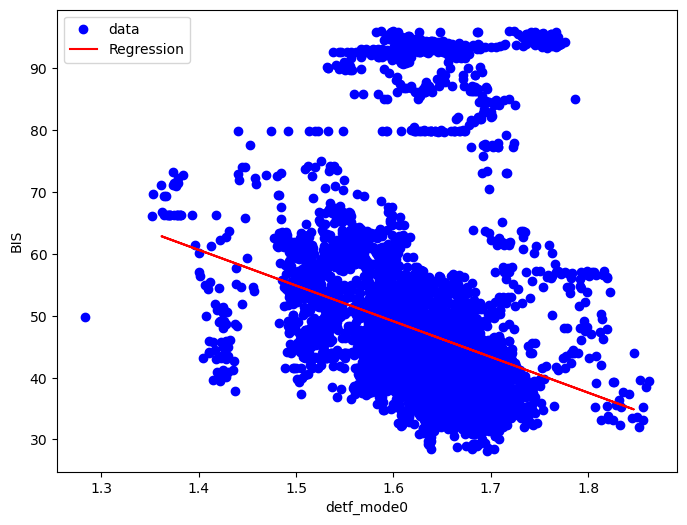

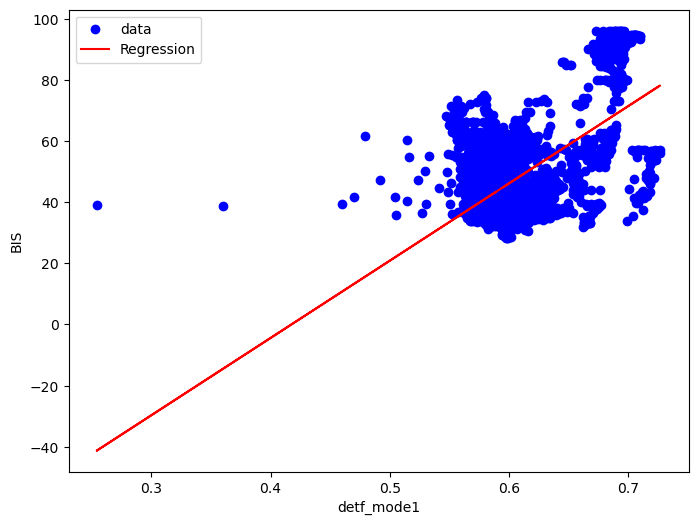

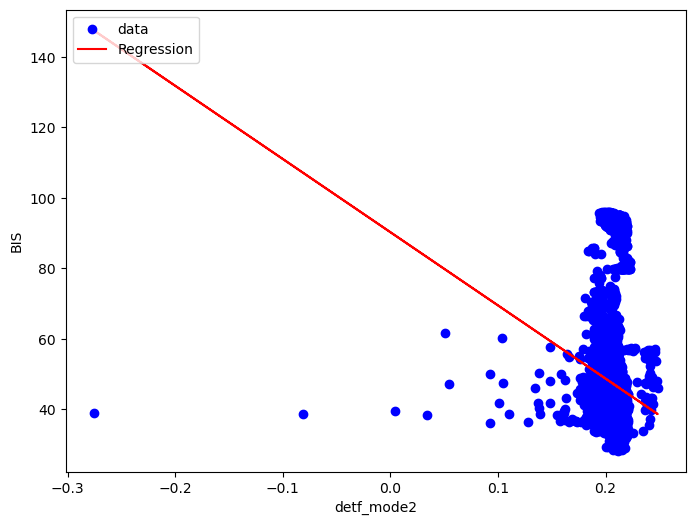

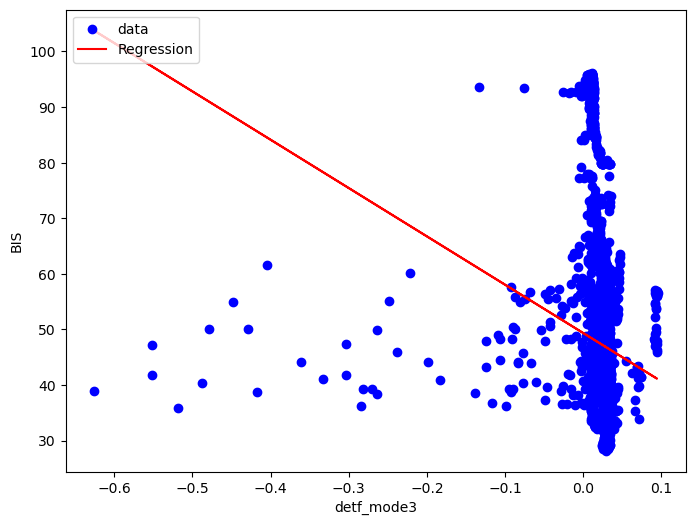

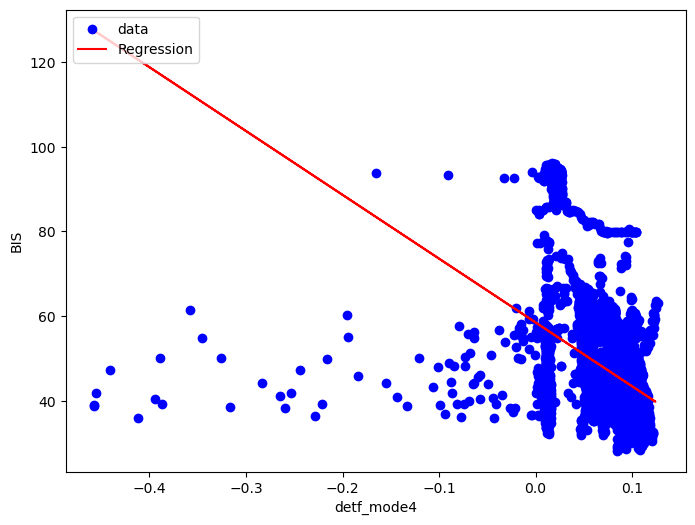

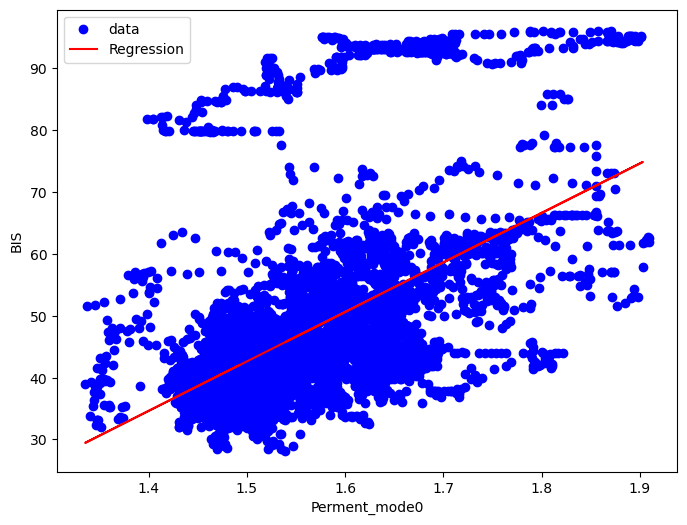

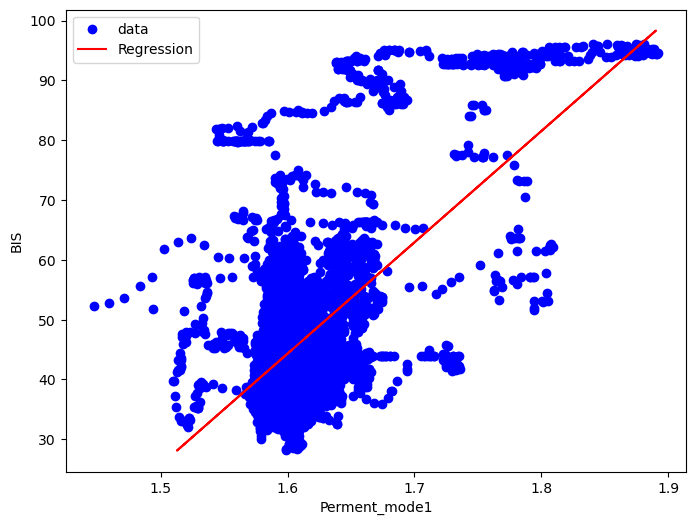

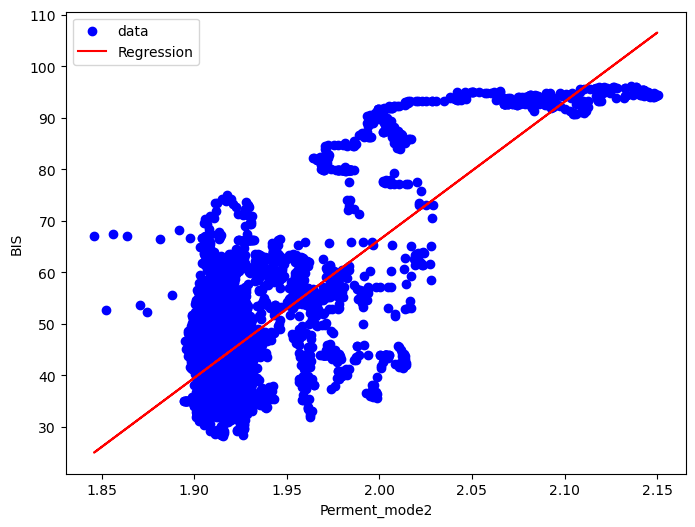

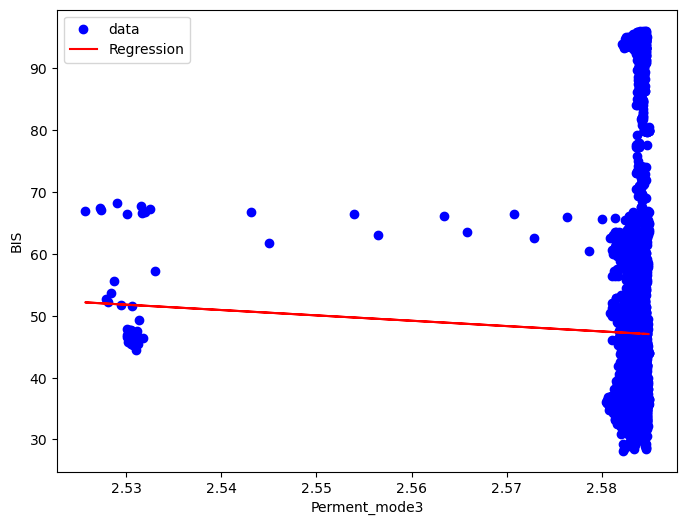

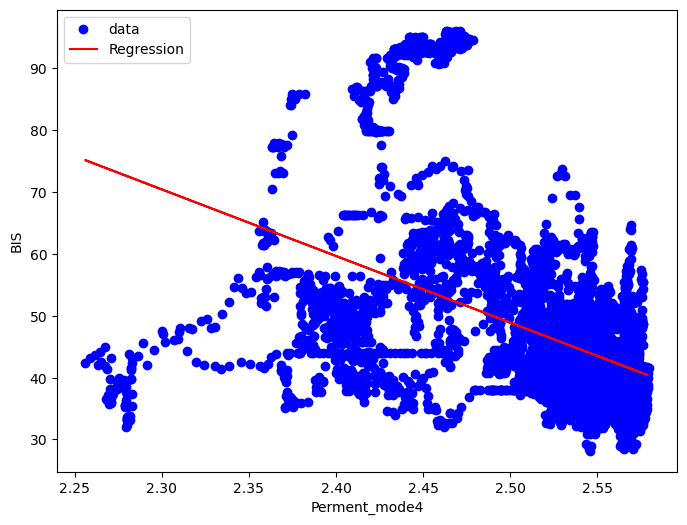

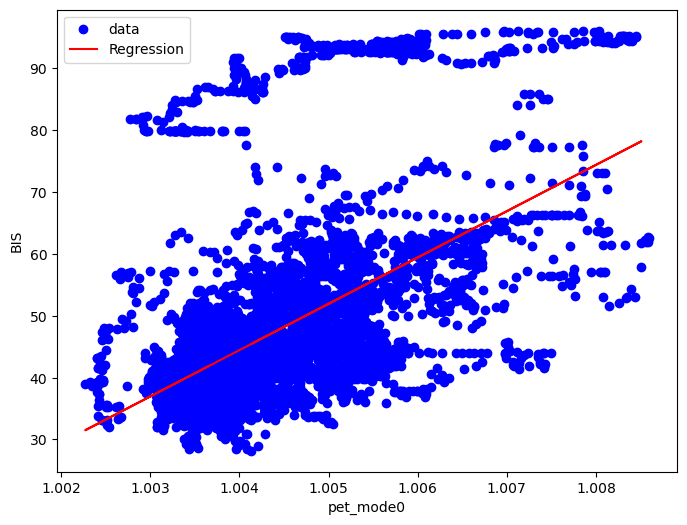

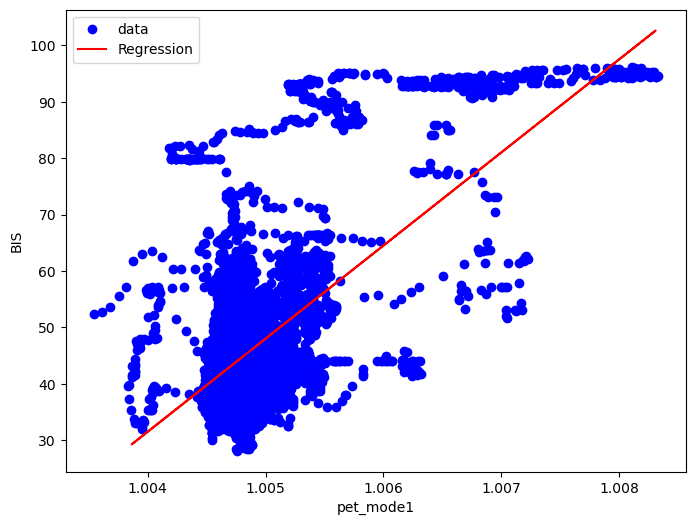

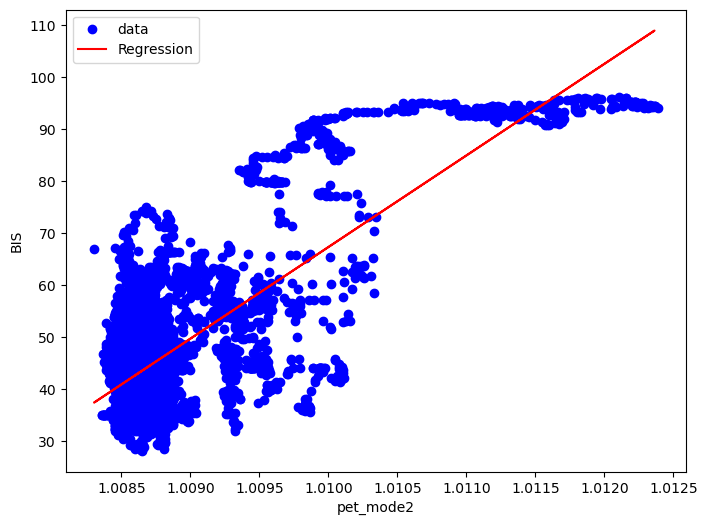

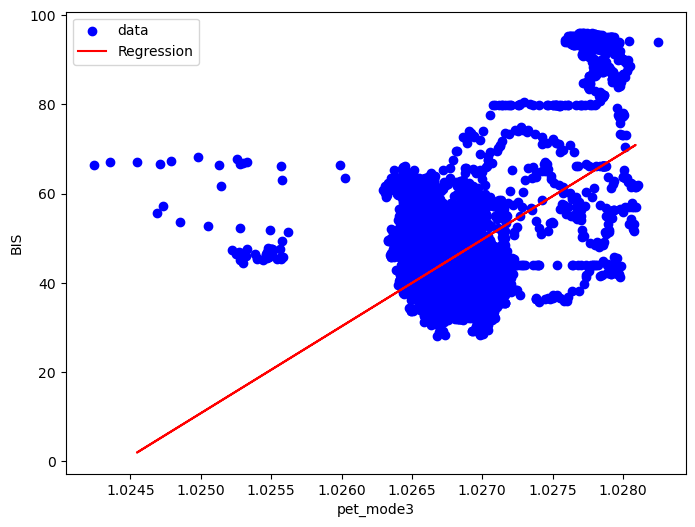

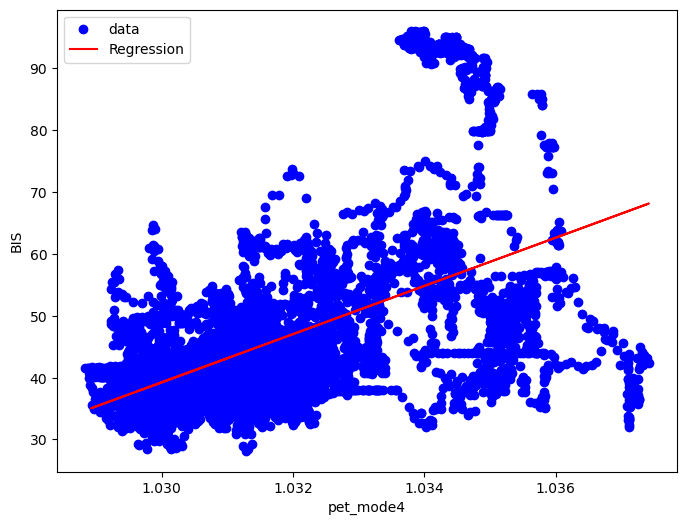

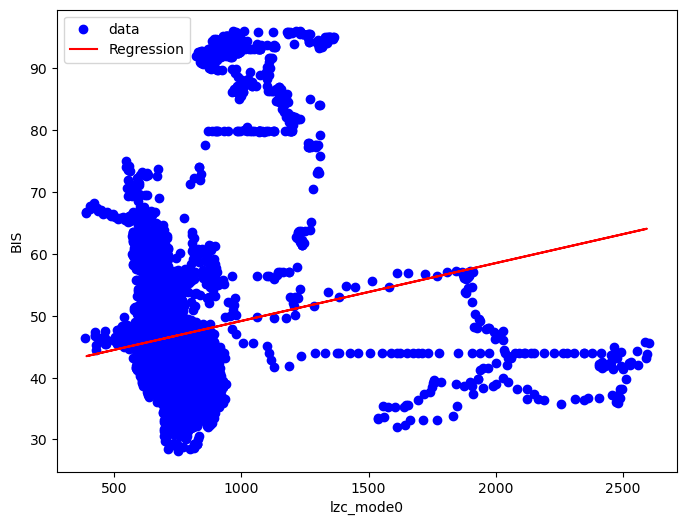

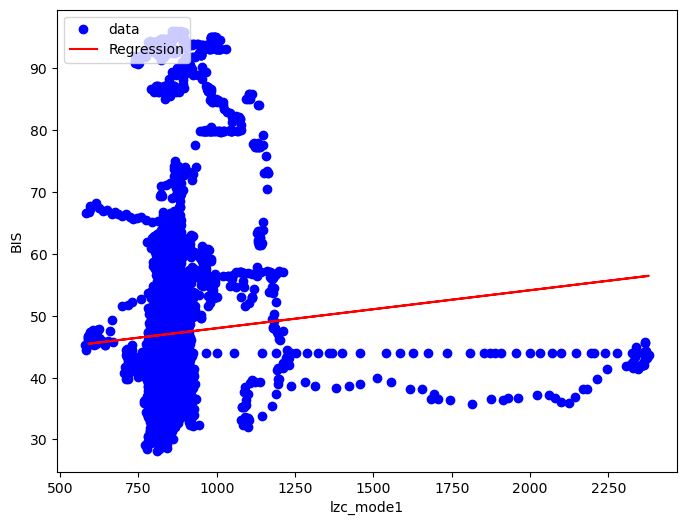

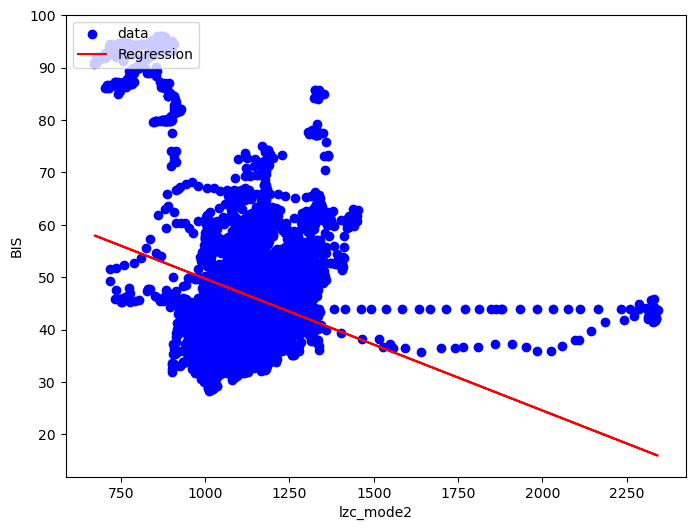

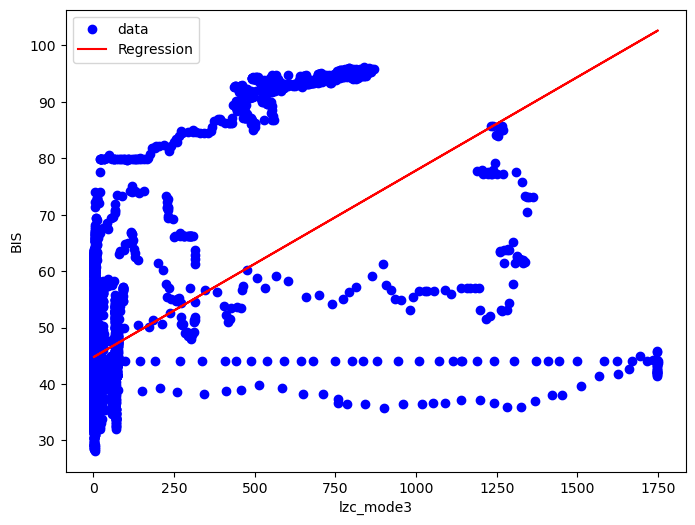

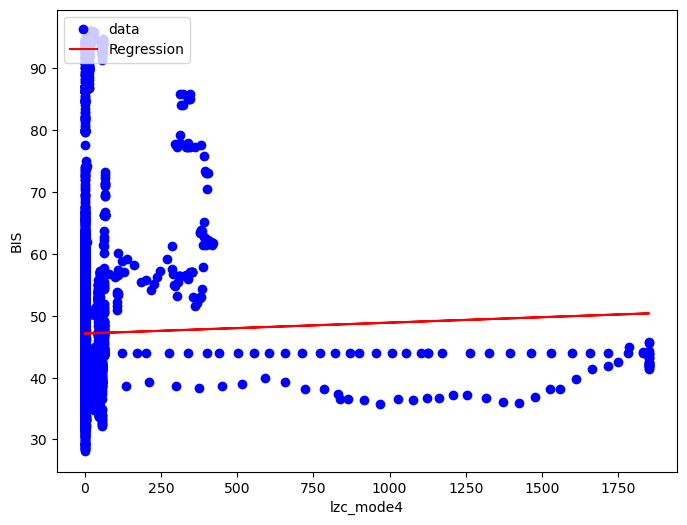

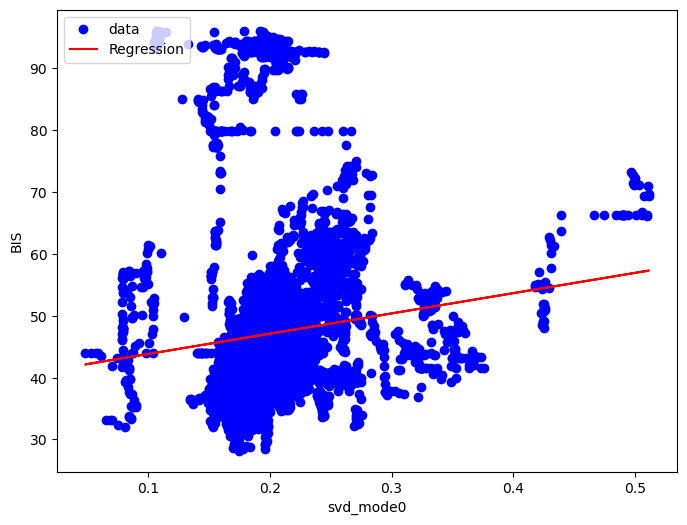

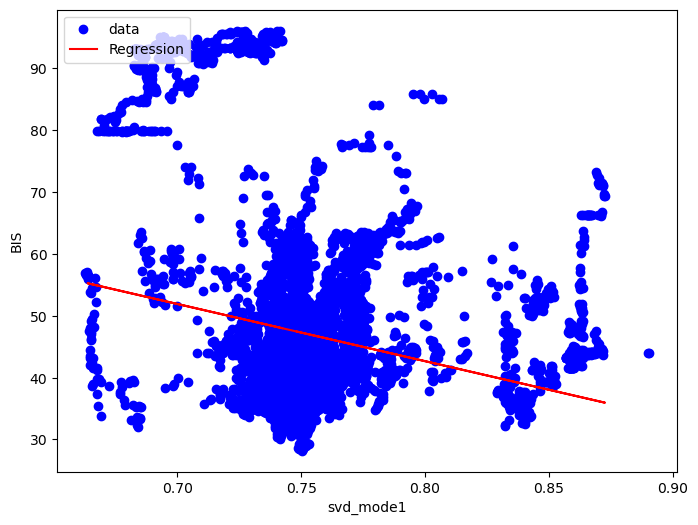

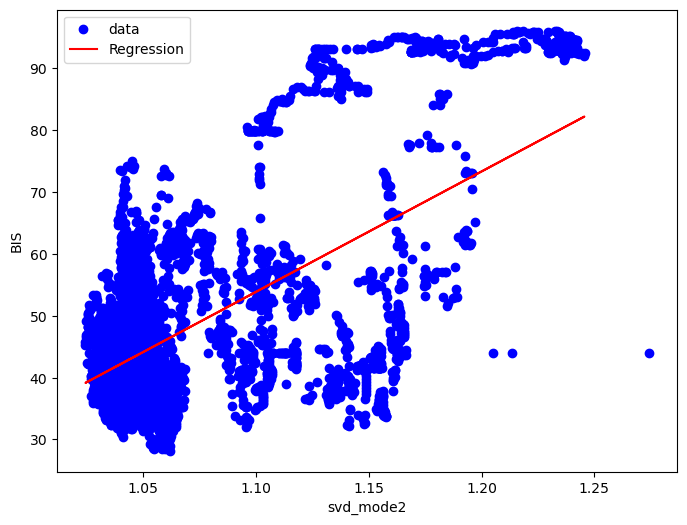

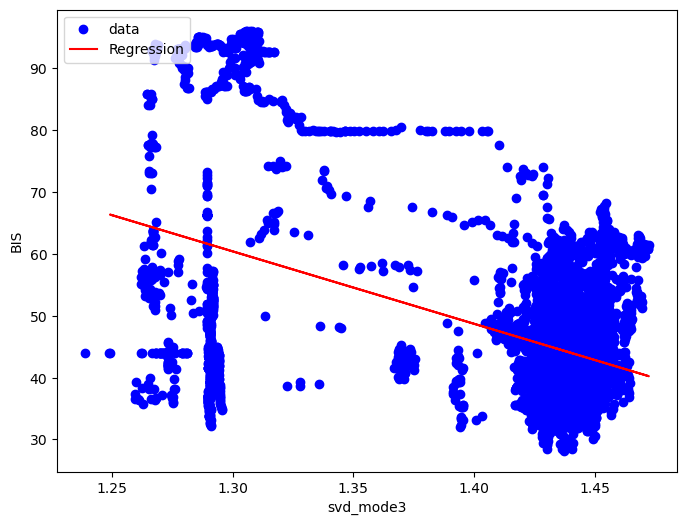

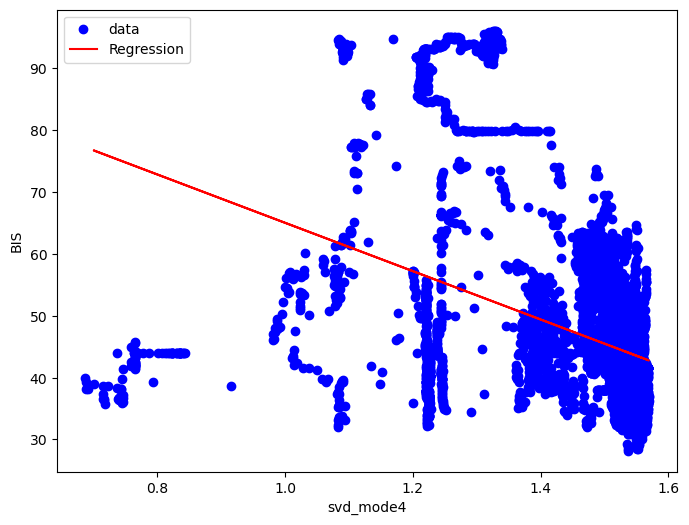

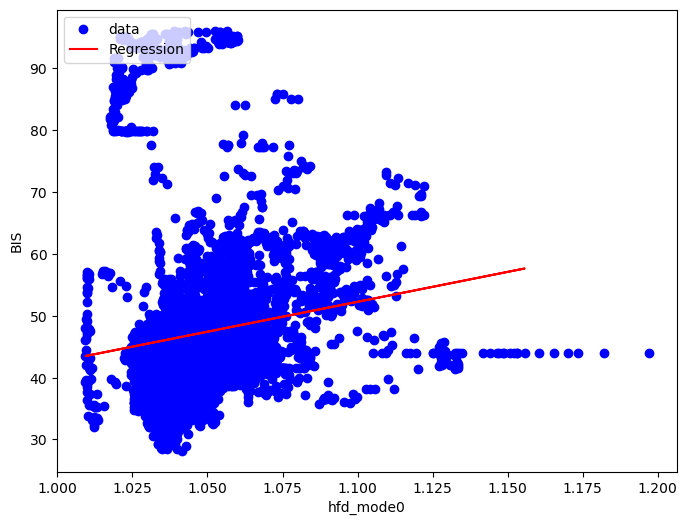

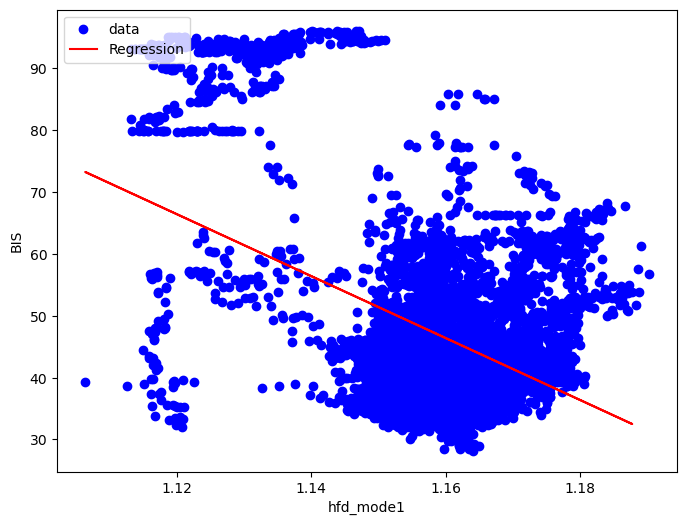

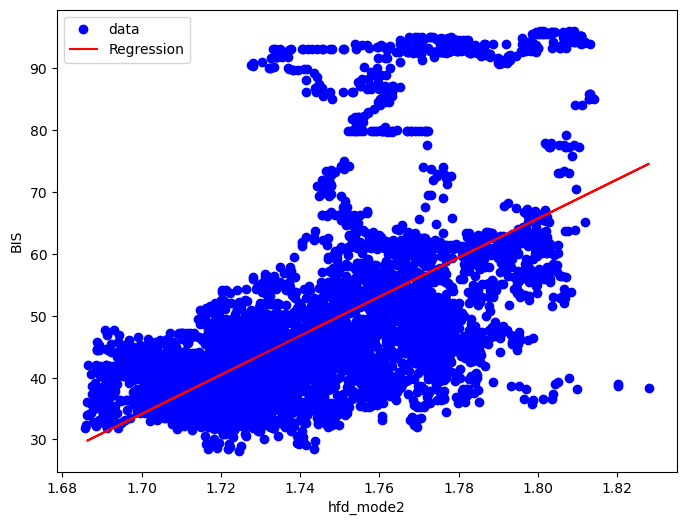

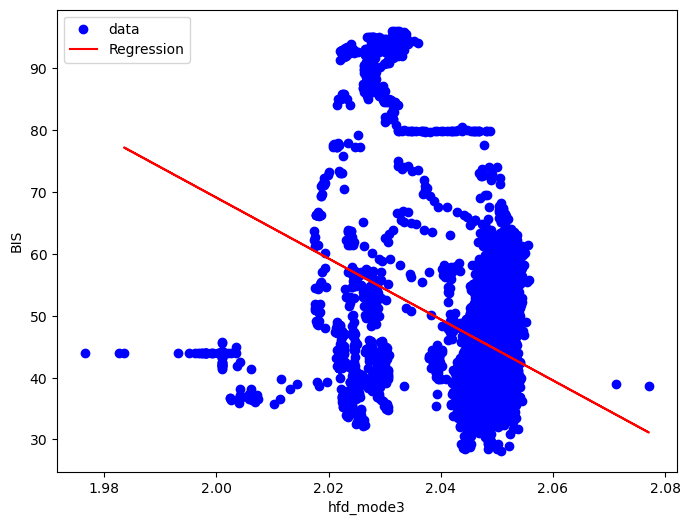

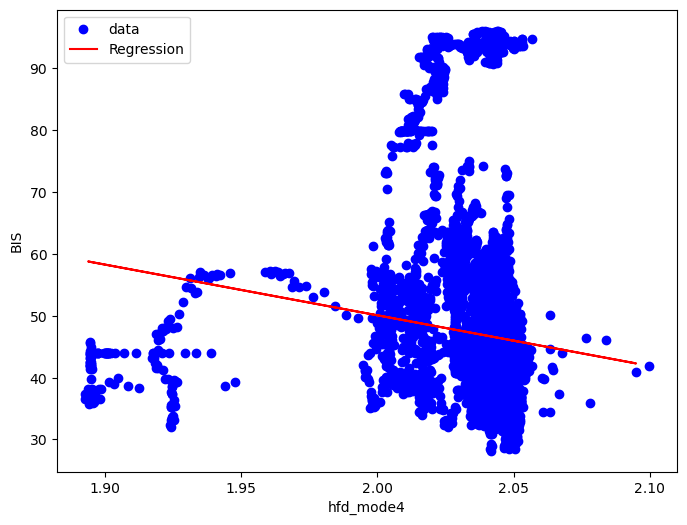

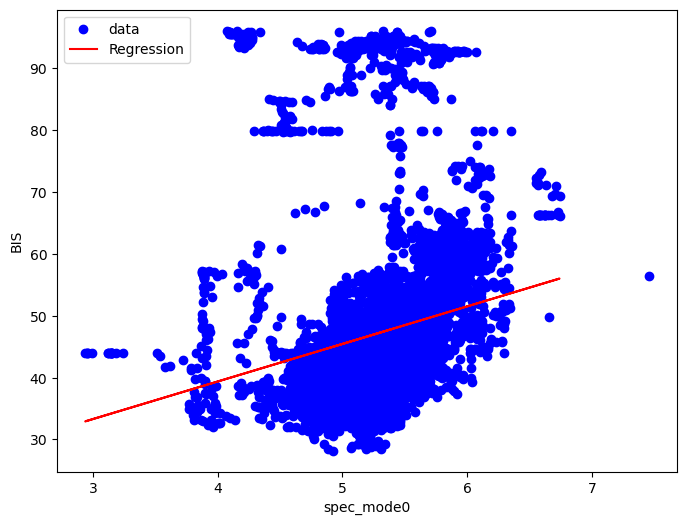

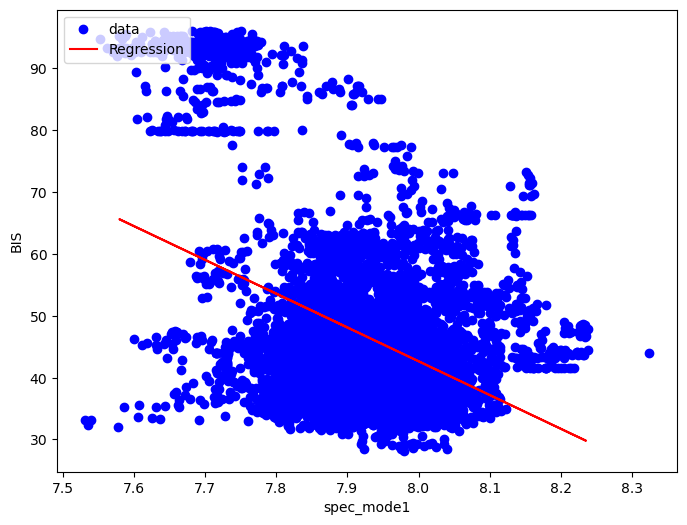

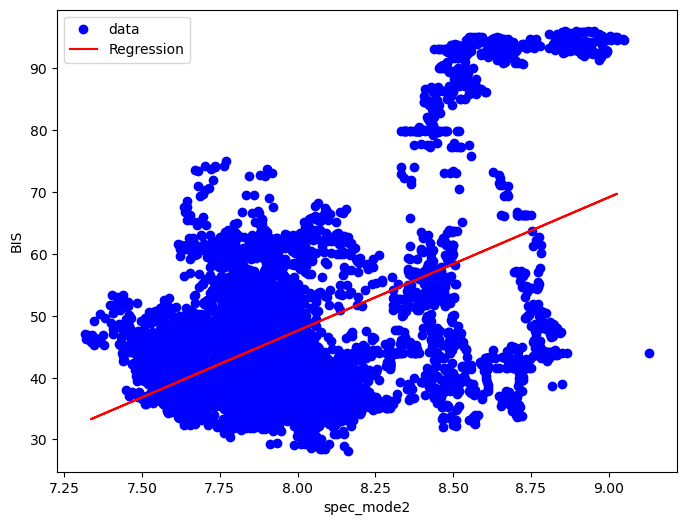

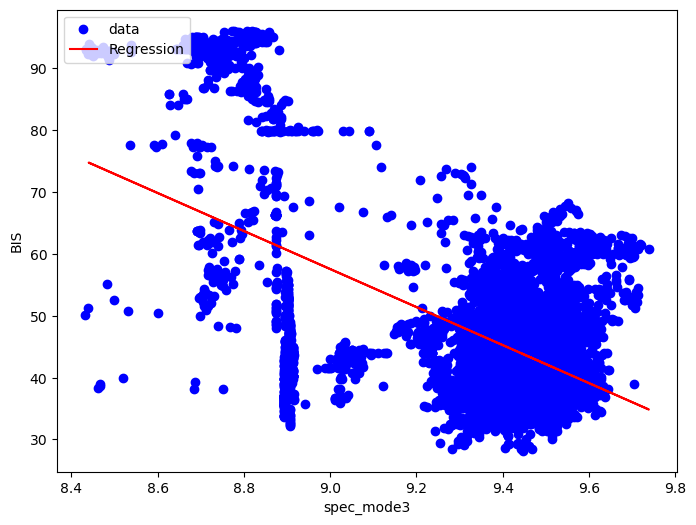

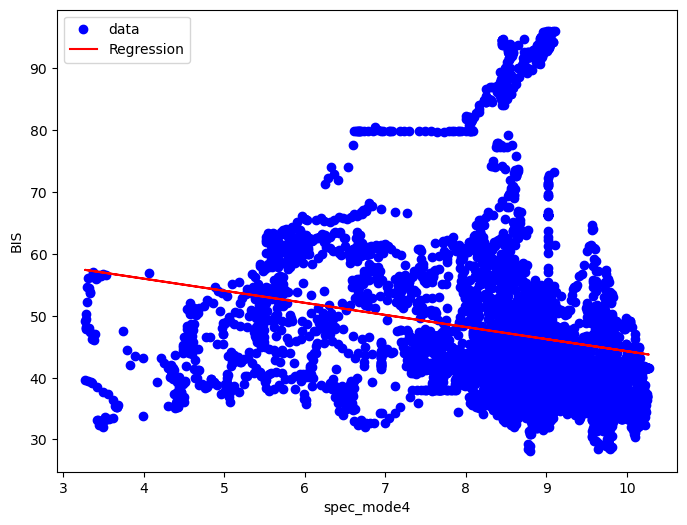

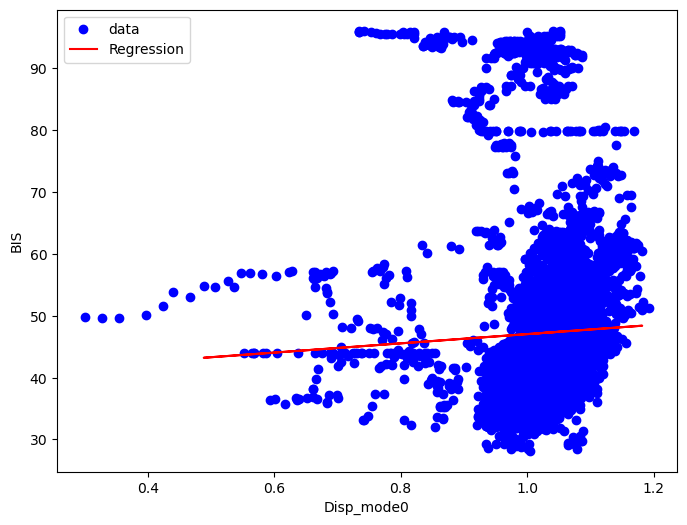

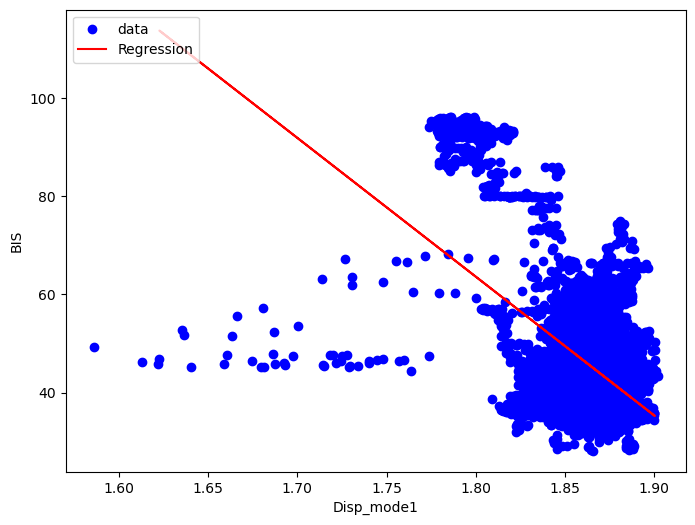

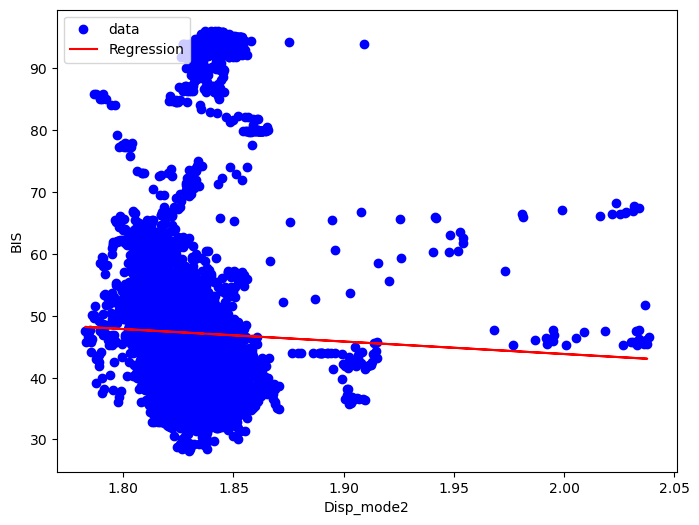

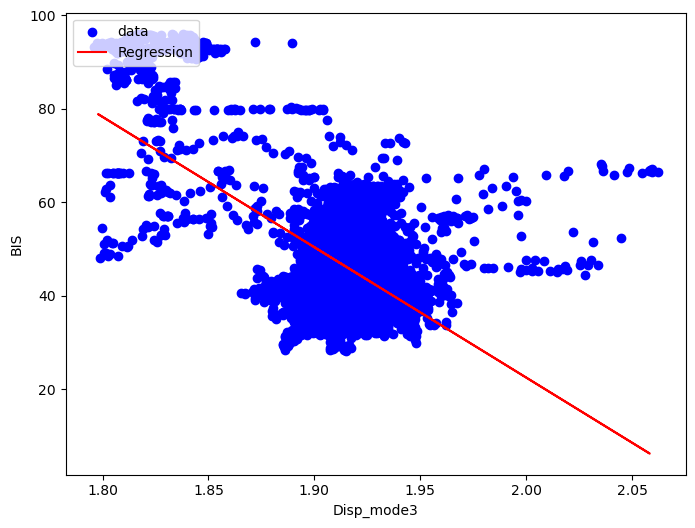

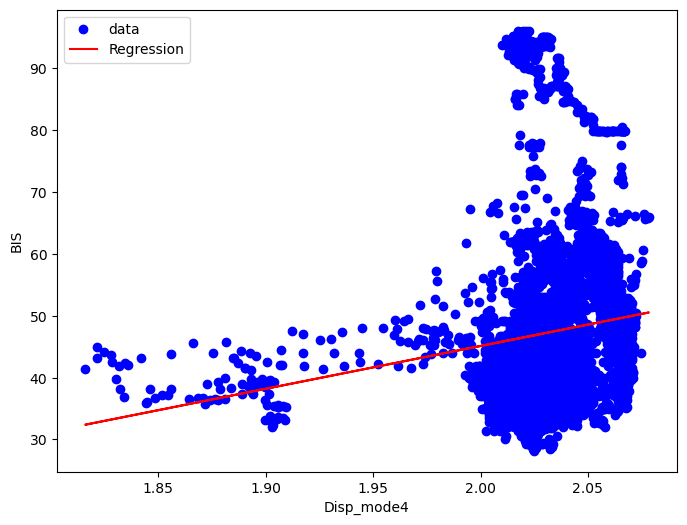

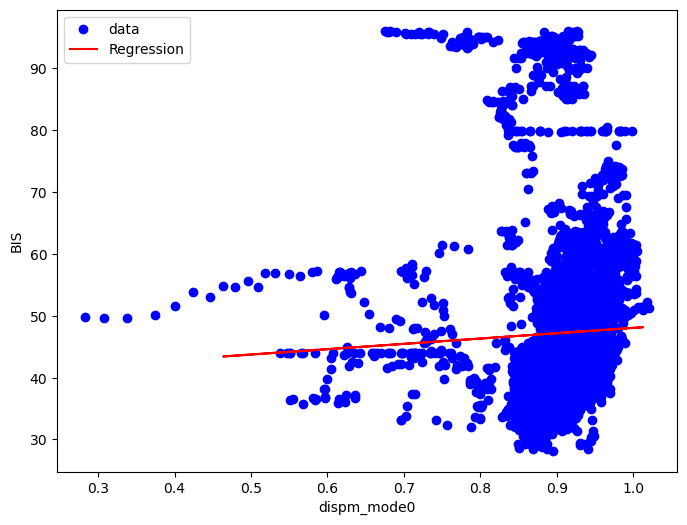

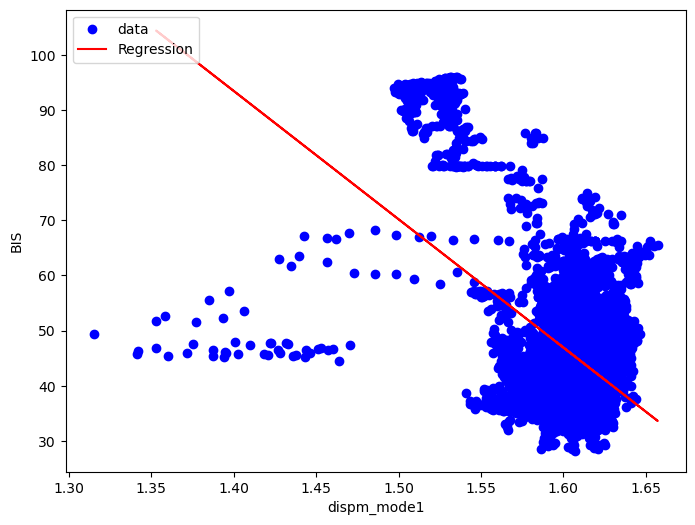

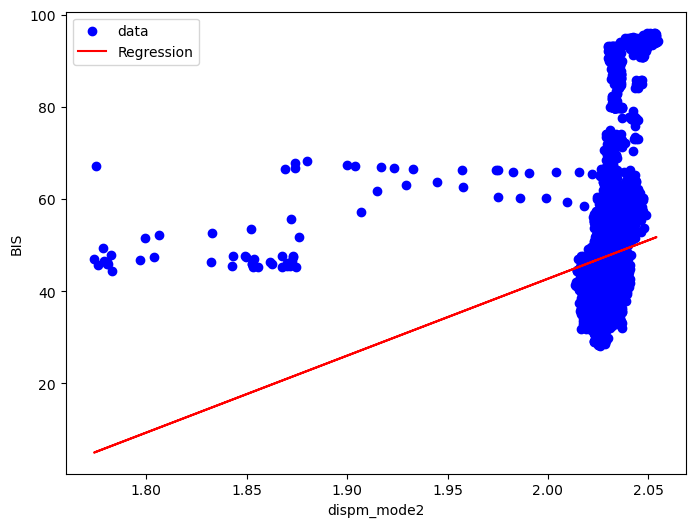

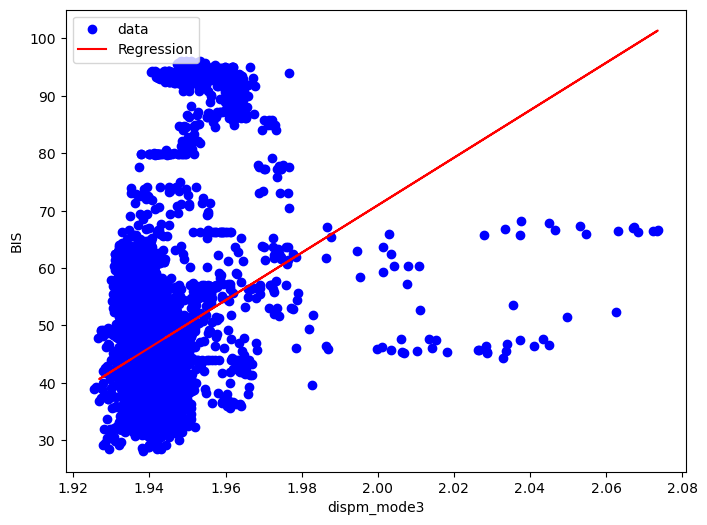

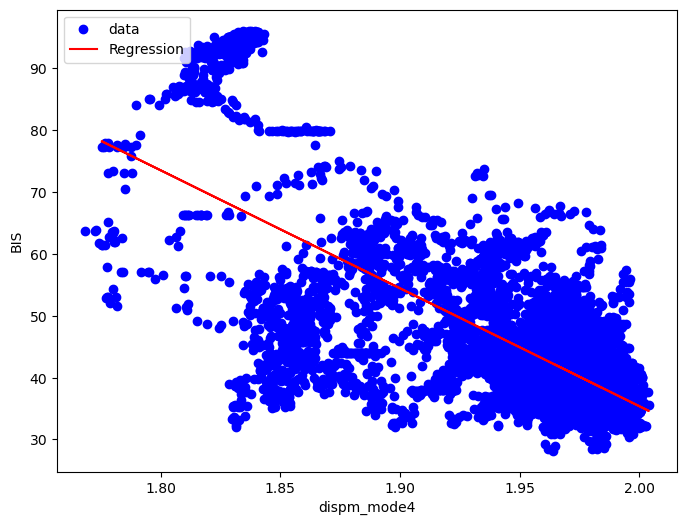

In [6]:

for column in patient_129.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient_129, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
27,pet_mode2_r2,56.465770
22,Perment_mode2_r2,55.856087
59,dispm_mode4_r2,44.087256
26,pet_mode1_r2,39.392531
21,Perment_mode1_r2,38.111472
2,hm_mode2_r2,36.903797
53,Disp_mode3_r2,35.483387
7,hc_mode2_r2,34.915536
37,svd_mode2_r2,34.337147
42,hfd_mode2_r2,33.445952


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
53     Disp_mode3    0.601514
42      hfd_mode2    0.075492
45     spec_mode0    0.041066
56    dispm_mode1    0.037836
1        hm_mode1    0.022620
35      svd_mode0    0.021621
32      lzc_mode2    0.019709
49     spec_mode4    0.016631
48     spec_mode3    0.015576
55    dispm_mode0    0.009438
30      lzc_mode0    0.009158
44      hfd_mode4    0.008241
0        hm_mode0    0.006467
7        hc_mode2    0.006301
25      pet_mode0    0.006300
59    dispm_mode4    0.005471
16     detf_mode1    0.005460
40      hfd_mode0    0.005001
5        hc_mode0    0.004546
15     detf_mode0    0.004083
46     spec_mode1    0.003865
52     Disp_mode2    0.003682
43      hfd_mode3    0.003615
20  Perment_mode0    0.003403
28      pet_mode3    0.003012
54     Disp_mode4    0.002996
6        hc_mode1    0.002984
33      lzc_mode3    0.002951
31      lzc_mode1    0.002748
51     Disp_mode1    0.002732
47     spec_mode2    0.002635
19     detf_mode4    0.002566
22  Permen